*David Schlangen, 2019-07-05*

# How to View the Dialogues


This notebook illustrates how to work with the logfiles of the dialogue experiments.

In [1]:
import sys

from glob import glob
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('max_colwidth', -1)

sys.path.append('./code')
from slurk_utils import logs_to_dfs, postproc_df, pp, parse_event_mu, reformat_dial_pp, plot_ade_row

/var/folders/qr/pz4s2chx5l371f0cl4ndfmm400mc1_/T/ipykernel_59155/2934870281.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [2]:
# if you want to look at what the players saw, you must download the ADE20k corpus,
# and point this environment variable to where it is on your system.
os.environ['ADE_20k_PATH'] = './ADE20K_2021_17_01/images/'

In [3]:
mu_path = './data/meetupX'

dial_days = [
    '2018-11-29',
    '2018-11-30',
    '2018-12-01',
    '2018-12-02']

dials = [p for s in [glob(os.path.join(mu_path, good_dial, '*log')) for good_dial in dial_days] for p in s]

dial, meta_data = logs_to_dfs(dials, parser=parse_event_mu)
dial = [postproc_df(this_df) for this_df in dial]

In [4]:
len(dial)

430

This loads the logfiles into an easy to work with DataFrame format:

In [6]:
dial[0][25:]

,msg,time,user,A_type,B_type,m-type,receiver,A_inst,B_inst,userID
25,You can go: [/e]ast [/w]est,0 days 00:00:11,GM,/a/art_studio,/p/playroom,text,B,/a/art_studio/ADE_train_00001745.jpg,/p/playroom/ADE_train_00015388.jpg,97
26,cmd: e,0 days 00:00:15,A,/a/art_studio,/p/playroom,command,All,/a/art_studio/ADE_train_00001745.jpg,/p/playroom/ADE_train_00015388.jpg,136
27,i'm in the playroom,0 days 00:00:15,B,/a/art_studio,/p/playroom,text,All,/a/art_studio/ADE_train_00001745.jpg,/p/playroom/ADE_train_00015388.jpg,137
28,url: /b/bedroom/ADE_train_00004010.jpg,0 days 00:00:15,GM,/b/bedroom,/p/playroom,new_image,A,/b/bedroom/ADE_train_00004010.jpg,/p/playroom/ADE_train_00015388.jpg,97
29,cmd: new_image,0 days 00:00:15,GM,/b/bedroom,/p/playroom,command,All,/b/bedroom/ADE_train_00004010.jpg,/p/playroom/ADE_train_00015388.jpg,97
...,...,...,...,...,...,...,...,...,...,...
96,,0 days 00:03:52,B,/p/playroom,/p/playroom,leave,All,/p/playroom/ADE_train_00015388.jpg,/p/playroom/ADE_train_00015388.jpg,137
97,sticky_eraser has left the game.,0 days 00:03:53,GM,/p/playroom,/p/playroom,text,A,/p/playroom/ADE_train_00015388.jpg,/p/playroom/ADE_train_00015388.jpg,97
98,,0 days 00:03:56,A,/p/playroom,/p/playroom,leave,All,/p/playroom/ADE_train_00015388.jpg,/p/playroom/ADE_train_00015388.jpg,136
99,deep_scissors has left the game.,0 days 00:03:56,GM,/p/playroom,/p/playroom,text,B,/p/playroom/ADE_train_00015388.jpg,/p/playroom/ADE_train_00015388.jpg,97


We provide some convenience functions that make this a little bit easier to read. (This is particularly nice if you run this in Jupyter Lab, where you can open a separate view of an output cell, so you can put the transcript next to the main notebook.)

In [6]:
for i in range(len(dial)):
    this_dial = dial[i]
    df = reformat_dial_pp(this_dial)
    final_df = df.loc[df['public'] != ""]
    final_df.to_csv('./data/extracted_dialogs/dial_'+str(i)+'.csv')

p/playroom
r/reading_room
d/dining_room
l/locker_room
b/basement
n/nursery
s/staircase
w/wine_cellar/bottle_storage
a/attic
w/wine_cellar/bottle_storage
d/doorway/indoor
b/basement
h/home_office
r/reading_room
b/bathroom
u/utility_room
j/jacuzzi/indoor
k/kitchen
a/attic
d/dining_room
s/staircase
p/playroom
j/jacuzzi/indoor
u/utility_room
b/bedroom
l/locker_room
d/doorway/indoor
c/childs_room
w/waiting_room
a/attic
k/kitchen
w/wine_cellar/bottle_storage
w/wine_cellar/bottle_storage
w/wine_cellar/bottle_storage
b/bathroom
j/jacuzzi/indoor
c/childs_room
a/attic
l/locker_room
j/jacuzzi/indoor
r/reading_room
b/balcony/interior
r/reading_room
b/basement
j/jacuzzi/indoor
l/locker_room
l/locker_room
d/dining_room
u/utility_room
d/doorway/indoor
l/locker_room
b/bathroom
d/dining_room
j/jacuzzi/indoor
p/playroom
k/kitchen
r/reading_room
h/home_office
c/childs_room
j/jacuzzi/indoor
h/home_office
p/playroom
s/staircase
w/wine_cellar/bottle_storage
a/attic
l/locker_room
h/home_office
l/living_room


###### If you want to see what the players saw at a particular point in the interaction, just provide the line in the transcript to the following function. (This only works if you have access to the ADE20k images, obviously; and if you have set the environment variable as described above.)

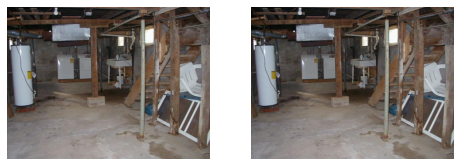

In [10]:
plot_ade_row(this_dial, 71)

In [7]:
reformat_dial_pp(dial[0])

p/playroom


,time,A-private,public,B-private,user,receiver
10,0 days 00:00:03,GM: url: / a/ art_studio/ ADE_train_00001745.jpg,,,GM,A
12,0 days 00:00:03,GM: You can go: [/ n]orth [/ e]ast,,,GM,A
13,0 days 00:00:03,"GM: Welcome to the game, deep_scissors! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",,,GM,A
14,0 days 00:00:03,GM: You have to meet in the room of type: p/ playroom,,,GM,A
15,0 days 00:00:03,,,GM: url: / g/ garage/ outdoor/ ADE_train_00008504.jpg,GM,B
17,0 days 00:00:04,,,GM: You can go: [/ w]est,GM,B
18,0 days 00:00:04,,,"GM: Welcome to the game, sticky_eraser! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",GM,B
19,0 days 00:00:04,,,GM: You have to meet in the room of type: p/ playroom,GM,B
20,0 days 00:00:08,,,B: cmd: n,B,All
21,0 days 00:00:09,,,GM: Nothing happened.You can go: [/ w]est,GM,B


None

,time,public,user,receiver
0,0 days 00:00:00,A:,A,All
1,0 days 00:00:01,B:,B,All
2,0 days 00:00:01,GM:,GM,All
3,0 days 00:00:01,,GM,All
4,0 days 00:00:02,,GM,All
...,...,...,...,...
96,0 days 00:03:52,B:,B,All
97,0 days 00:03:53,,GM,A
98,0 days 00:03:56,A:,A,All
99,0 days 00:03:56,,GM,B


In [12]:
final_df = df.loc[df['public'] != ""]

In [13]:
final_df

,time,public,user,receiver
0,0 days 00:00:00,A:,A,All
1,0 days 00:00:01,B:,B,All
2,0 days 00:00:01,GM:,GM,All
47,0 days 00:01:13,"GM: The '/done' command has been issued by you or your partner. To finish the game, both players need to enter '/done'",GM,All
53,0 days 00:01:47,"GM: The '/done' command has been issued by you or your partner. To finish the game, both players need to enter '/done'",GM,All
54,0 days 00:02:19,A: I am in the basement are u?,A,All
55,0 days 00:02:34,A: I see a water heater and stairs and a sin,A,All
56,0 days 00:03:01,GM: Attention: you are in the game for 3 minutes!,GM,All
58,0 days 00:03:06,"GM: The '/done' command has been issued by you or your partner. To finish the game, both players need to enter '/done'",GM,All
59,0 days 00:03:09,B: i will find i,B,All
